# Mall Customers

## Customer segmentation using K-means clustering

---

Sometimes, we have to work on a dateset which doesn't have neither classified nor labeled type information like we have in **classification** or **regression** problems. This kind of dataset requires the use of **unsupervised** ML algorithms to find the latent patterns, groups and other relevant information as insights, by using which, we can make business decisions to improve the sales of a product better then before (among one of it's many examples). 

The problem we are dealing with here belongs to the above described category only. We have with us, a dataset taken from Kaggle for the purpose of learning how the algorithm works and curiosity (which happens with me alot). According to the problem statement, we need to find patterns in the data and on the basis of that assign them to particular groups based on their properties (similar datapoints to be grouped together). This task of grouping the data is known as [**Clustering**](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/). 

Basically, we are required to create partitions of our customer profile features (age, salary range, gender, spending score) so that marketing schemes can be devised to hype up sales profit of the mall by targeting certain customers and make an approach towards some potential window shoppers to convert them as customers. This application of clustering is better known as **Customer Segmentation** in business terms. 

We will be using **K-means** clustering, which is a type of clustering technique based on centroid-distance method. In a plot, datapoints closer to the randomly (among other centroid placement methods) placed centroids will be grouped as one cluster (a group), then the centroid postition is iteratively changed untill their position isn't changing anymore. 

In [1]:
#basic libraries for data processing and visualization
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "whitegrid", palette = "inferno")

#libraries for feature processing and clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [2]:
#importing the dataset
asset = pd.read_csv("Mall_Customers.csv")
asset

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#removing the ID column
asset = asset.iloc[:, 1:]

In [4]:
asset.describe(include = "all")

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [5]:
asset.isnull().sum() #checkin null values

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## EDA

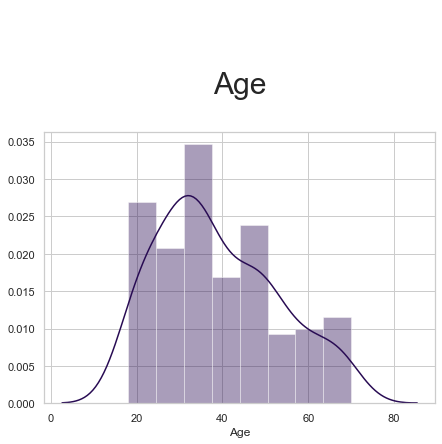

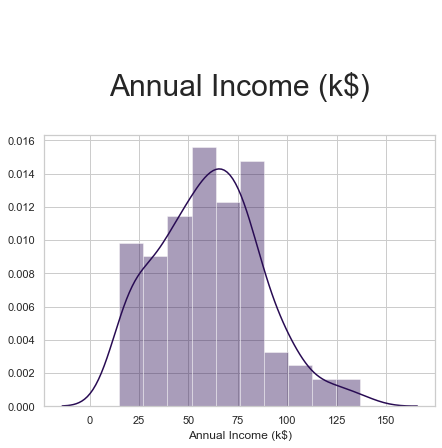

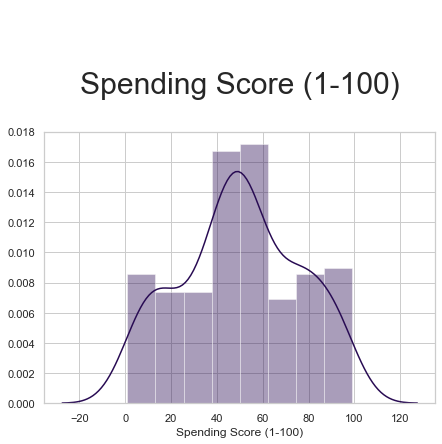

In [6]:
#visualizing the variables
for i in asset:
    if asset[i].dtype != "object":
        plt.figure(figsize = (7, 5))
        sns.distplot(asset[i])
        plt.title("\n\n{}\n".format(i), fontsize = 30)
        plt.show()
        
    else:
        continue

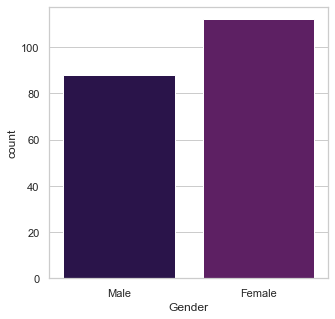

In [7]:
plt.figure(figsize = (5, 5))
sns.countplot(asset["Gender"])
plt.show()

<Figure size 720x720 with 0 Axes>

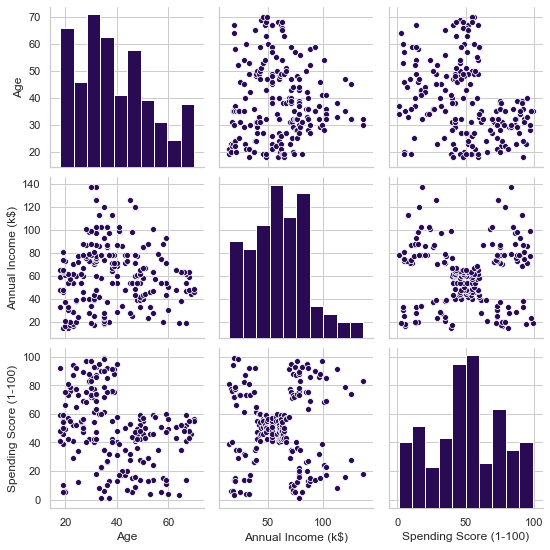

In [8]:
#bivariate visualization
plt.figure(figsize = (10, 10))
sns.pairplot(asset)
plt.show()

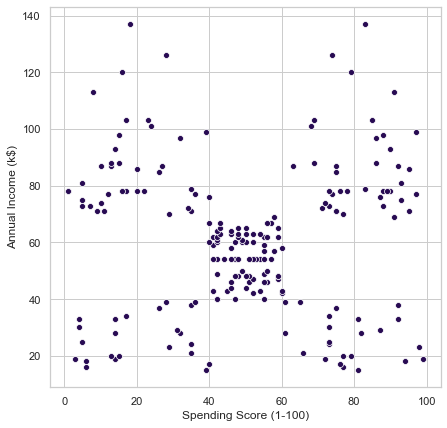

In [9]:
#annual income vs spending score plot
plt.figure(figsize = (7, 7))
sns.scatterplot(asset.iloc[:, -1], asset.iloc[:, 2])
plt.show()

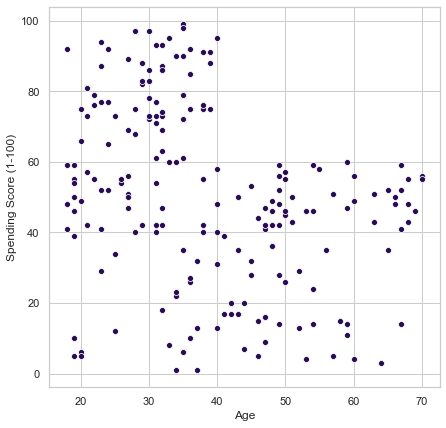

In [10]:
#spending score vs age
plt.figure(figsize = (7, 7))
sns.scatterplot(asset.iloc[:, 1], asset.iloc[:, -1])
plt.show()

#### Some insights - 
- Our dataset has **200 rows × 5 columns**.
- With the ID variable dropped, there doesn't seem to be any significant outliers and no missing values in our data.
- In the Age variable, customers range **20 to <40 years old**, is frequent to visit the mall.
- **Female** shoppers are significantly higher in count than their counterparts, for obvious reasons.
- Age group in the range **30 to 50** years old is having higher salary range (**>80k**).
- The relation between salary and spending score is showing 5 groups in the plot:

    1> **Group 1**: annual income **10k - <=40k** with spending score between **0 - 40**.
    
    2> **Group 2**: annual income **>60k - 140k** with spending score between **0 - 40**.
    
    3> **Group 3**: annual income **40k - <70k** with spending score between **40 - 60**.
    
    4> **Group 4**: annual income **10k - <40k** with spending score between **60 - 100**.
    
    5> **Group 5**: annual income **>60k - 140k** with spending score between **60 - 100**.
    
    
- The Age group of **<=40** years old, is having the highest spending score: **0 - 100**, age group older the 40 years old have their spending score limited to under **60**.

## Feature processing and Kmeans implementation

In [11]:
#converting gender column into numerical type
lbe = LabelEncoder()
asset["Gender"] = lbe.fit_transform(asset["Gender"])

In [12]:
#normalising the units across our variables by Standard Scaler
scaler = StandardScaler()
asset.iloc[:, 1:] = scaler.fit_transform(asset.iloc[:, 1:])

In [13]:
#creating the instace of KMeans with a random no. of clusters as 2, fitting the instance to our dataset
kmeans = KMeans(n_clusters = 2)
clust_model = kmeans.fit(asset)
kmeans.inertia_    #inertia metric for cluster quality evaluation

438.5224115567775

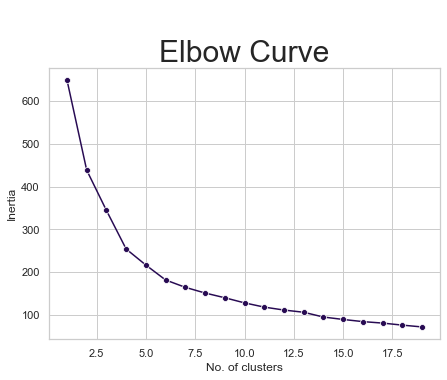

In [14]:
#looping to find optimal no. of clusters by using elbow method with inertia on y-axis and no. of clusters on x-axis
inertia = []
for k in range(1, 20):
    km = KMeans(n_clusters = k)
    opt_model = km.fit(asset)
    inertia.append(km.inertia_)
    
plt.figure(figsize = (7, 5))
sns.lineplot(x = range(1, 20), y = inertia, marker = "o")
plt.title("\nElbow Curve", fontsize = 30)
plt.xlabel("No. of clusters")
plt.ylabel("Inertia")
plt.show()

In [79]:
#no. of clusters 4 - 7 are looking optimal, iterating to filter out the best one
kmeans = KMeans(n_clusters = 6)
clust_model = kmeans.fit(asset)    #seems optimal
kmeans.inertia_

181.95143624341458

In [84]:
#finally using 6 no. of clusters and fitting the KMeans on it, with k-means++ centroid initialisation method 
kmeans = KMeans(n_clusters = 6, init = "k-means++")
clust_model = kmeans.fit(asset)    #seems optimal
preds = kmeans.predict(asset)

In [86]:
#frame = pd.DataFrame(preds)
asset["Cluster"] = preds

In [88]:
#finally checking the count of our datavalues involved with the clusters we created
asset["Cluster"].value_counts()

3    45
2    39
1    38
4    34
5    23
0    21
Name: Cluster, dtype: int64

- Finally, these clusters can further be analysed according to the business requirement.

---